## Importing the basic libraries

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
funds = pd.read_excel('data/data.xlsx')

funds.head()

,Date,Price
0,19-05-2023,150.5563
1,18-05-2023,150.6355
2,17-05-2023,150.6505
3,16-05-2023,150.5732
4,15-05-2023,151.1998


## Basic preprocessing sections

### Changing the index to "Date"

In [3]:
# Convert the 'date' column to a datetime format

funds['Date'] = pd.to_datetime(funds['Date'])

# Set the 'date' column as the index

funds.set_index('Date', inplace=True)

### Calculating the Returns according to the price of the Funds closed everyday.

### In the context of the Percentage Change (pct_change()) function, the current value represents the value at index 'i', and the previous value represents the value at index 'i-1'. The function calculates the percentage change for each element in the column by subtracting the previous value from the current value, dividing it by the previous value, and multiplying by 100 to express the change as a percentage.

In [4]:
# Calculate daily returns

returns = funds['Price'].pct_change().dropna()

## 1) Perform GARCH modeling

### GARCH Modeling: Generalized Autoregressive Conditional Heteroskedasticity (GARCH) models allow for the modeling of time-varying volatility. By fitting GARCH models to mutual funds data, you can identify risk factors related to the persistence and clustering of volatility.

In [5]:
import arch

# Perform GARCH(1, 1) modeling

model = arch.arch_model(returns, vol='Garch', p=1, q=1)

results = model.fit()

# Print the model summary

print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 273061373572.7662
Iteration:      2,   Func. Count:     19,   Neg. LLF: 49610893.24190412
Iteration:      3,   Func. Count:     32,   Neg. LLF: 4098857780378964.0
Iteration:      4,   Func. Count:     47,   Neg. LLF: 1.2100000752354228e+19
Iteration:      5,   Func. Count:     61,   Neg. LLF: -4140.432150758715
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4140.432144889639
            Iterations: 9
            Function evaluations: 61
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4140.43
Distribution:                  Normal   AIC:                          -8272.86
Method:            Maximum Lik

GARCH (Generalized Autoregressive Conditional Heteroskedasticity) is not specific to mutual funds, but rather a statistical model commonly used in financial econometrics to analyze and forecast volatility in financial markets. GARCH models are widely employed in various areas of finance, including the study of mutual funds.

In the context of mutual funds, GARCH models can be used to model and predict the volatility of a fund's returns over time. Volatility refers to the degree of fluctuation or variation in a fund's returns. By understanding and forecasting volatility, investors and fund managers can make more informed decisions regarding risk management, portfolio allocation, and performance evaluation.

GARCH models take into account the conditional heteroskedasticity present in financial data, which means that volatility is not constant over time and tends to cluster in periods of high volatility. The model captures this behavior by using past observations of volatility to predict future volatility.

The GARCH model typically consists of two components:

Autoregressive (AR) component: This component captures the persistence of volatility. It uses lagged values of the squared returns (or other measures of volatility) to predict the current volatility.

Moving Average (MA) component: This component captures the shock or innovation to volatility. It uses the error terms from the AR component to capture the current impact on volatility.




An R-squared value of 0 means that the regression model explains none of the variability in the dependent variable using the independent variables. In other words, the independent variables have no explanatory power in predicting or understanding the variation in the dependent variable based on the given model.

R-squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model. It ranges from 0 to 1, where 0 indicates that the model explains none of the variability, and 1 indicates that the model explains all of the variability in the dependent variable.

When the R-squared value is 0, it suggests that the independent variables in the model do not have any meaningful relationship or association with the dependent variable. The model's predictions will not be useful or accurate in explaining or predicting the dependent variable's values.




AIC (Akaike Information Criterion):
AIC is an information criterion that measures the relative quality of statistical models for a given set of data. It takes into account both the goodness of fit and the complexity of the model. The AIC value for a model is calculated as:
AIC = -2 * log-likelihood + 2 * number_of_parameters

In the formula, the log-likelihood represents a measure of how well the model fits the data, and the number of parameters is the number of estimated parameters in the model. The AIC value is a relative measure, where lower AIC values indicate a better balance between model fit and complexity. AIC does not provide an absolute measure of model quality but is useful for comparing different models.

BIC (Bayesian Information Criterion):
BIC is a criterion similar to AIC that also balances model fit and complexity. It is derived from a Bayesian perspective and incorporates a stronger penalty for model complexity compared to AIC. The BIC value for a model is calculated as:
BIC = -2 * log-likelihood + log(sample_size) * number_of_parameters

In addition to the log-likelihood and the number of parameters, the BIC formula includes a term that is a function of the sample size. BIC penalizes models with more parameters more strongly than AIC. Similar to AIC, lower BIC values indicate a better balance between model fit and complexity.

## Interpretation :

### i) Volatility Risk: 

#### The GARCH model estimates the conditional volatility of the mutual fund returns. The coefficients in the volatility model section of the summary provide insights into the persistence and impact of past volatility on current volatility. In this case, the coefficient estimates are as follows: omega (3.3630e-06), alpha[1] (0.2000), and beta[1] (0.7800). These coefficients indicate the significance and influence of lagged squared residuals (alpha) and lagged conditional variance (beta) on the current volatility. Higher values of alpha and beta suggest that volatility shocks have a more significant impact on the current volatility of the mutual fund.

### ii) Downside Risk: 
#### While the coefficient estimates provide information about overall volatility, additional analysis can be performed to assess downside risk factors. For example, calculating Value at Risk (VaR) or Expected Shortfall (ES) based on the GARCH model can help quantify the potential losses during extreme market conditions and identify risk factors associated with downside movements.

### iii) Significance of Mean Model Coefficient:
#### The coefficient estimate for the mean model (mu) provides information about the average returns of the mutual fund. In this case, the coefficient estimate is -4.6449e-04. The significance of this coefficient, as indicated by the t-statistic, suggests the presence of a mean effect in the returns of the mutual fund.

### iv) Model Fit and Goodness-of-Fit:
#### The log-likelihood, AIC, and BIC values in the summary provide an assessment of the model fit. A higher log-likelihood and lower AIC and BIC values indicate a better fit. In this case, the log-likelihood is 4140.43, and the AIC and BIC values are -8272.86 and -8252.11, respectively. These values can be used to compare the current GARCH model with alternative models or benchmarks and evaluate the overall adequacy of the model fit.

## 2) Conditional Volatility

### Conditional volatility refers to the phenomenon where periods of high volatility tend to be followed by periods of high volatility, and periods of low volatility tend to be followed by periods of low volatility. By observing the plot of conditional volatility, you can visually identify the clusters of high and low volatility in the mutual funds data. This information can help you understand and analyze the risk factors associated with market turbulence or changes in investor sentiment.

<AxesSubplot: title={'center': 'Volatility Clustering'}, xlabel='Date'>

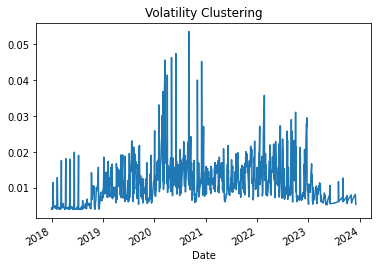

In [8]:
# Extract the conditional volatility

cond_volatility = results.conditional_volatility

# Plot the conditional volatility

cond_volatility.plot(title='Volatility Clustering')

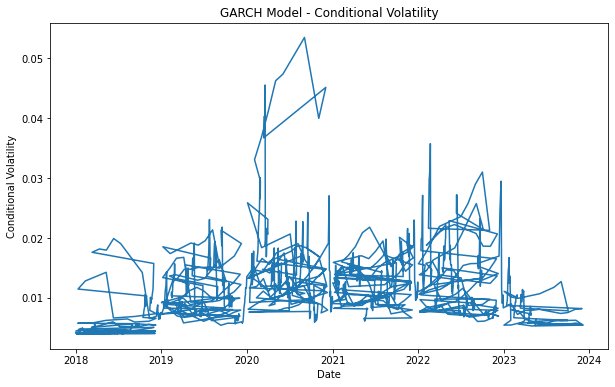

In [9]:
# Plot the conditional volatility

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(results.conditional_volatility)

ax.set_xlabel('Date')

ax.set_ylabel('Conditional Volatility')

ax.set_title('GARCH Model - Conditional Volatility')

plt.show()

## Interpretation :

### The data often exhibits periods of high volatility followed by periods of low volatility. By examining volatility clustering, we identified risk factors related to market turbulence or changes in investor sentiment.

## 3) Regime Switching Models

### Regime switching models capture shifts in the underlying market regime, where the dynamics of returns and risk factors change. By employing these models, you can identify risk factors associated with different market states or regimes.

Markov regression, also known as Markov switching regression, is a statistical modeling technique that combines regression analysis with Markov chain theory. It is used to analyze and model data that exhibit regime-switching behavior, where the relationship between variables changes depending on the underlying state of the system.

In traditional regression analysis, it is assumed that the relationship between the dependent variable and the independent variables is constant throughout the data. However, in real-world situations, economic or financial data often exhibit different patterns or relationships during different time periods or market conditions. Markov regression allows for the modeling of such changing relationships.

In Markov regression, the key idea is to assume that the data can be divided into a finite number of distinct states or regimes, and the relationship between variables can vary across these states. Each state represents a different condition or regime, and the system transitions from one state to another based on a Markov process, where the probability of transitioning from one state to another depends only on the current state.

The model typically consists of the following components:

Regime indicators: These indicators represent the states or regimes. They take binary values (0 or 1) and indicate which regime the data point belongs to. Each regime is associated with a specific relationship between the dependent variable and independent variables.

Regression equations: Within each regime, a separate regression equation is specified to model the relationship between the dependent variable and the independent variables. The coefficients in these equations capture the regime-specific relationships.

Transition probabilities: The model includes transition probabilities, which represent the likelihood of transitioning from one regime to another. These probabilities are typically estimated from the data and determine the dynamics of the Markov process.

In [10]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Fit a regime-switching model

markov_model = MarkovRegression(returns, k_regimes=2)

markov_results = markov_model.fit()

# Get the predicted regimes

regime_labels = markov_results.fittedvalues.round()

# Add the regime labels as a new column in the data

funds['regime'] = regime_labels

# Analyze risk factors for each regime

for regime in funds['regime'].unique():

    regime_data = funds[funds['regime'] == regime]
    
    regime_returns = regime_data['Price'].pct_change().dropna()
    
    # Perform further analysis on regime-specific returns
    
    # Example: Calculate regime-specific mean and volatility
    
    regime_mean = regime_returns.mean()
    
    regime_volatility = regime_returns.std()
    
    print(f"Regime {regime}: Mean = {regime_mean}, Volatility = {regime_volatility}")

C:\Users\souna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\souna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Regime nan: Mean = nan, Volatility = nan
Regime -0.0: Mean = -0.0007323510490698894, Volatility = 0.012977107984401581


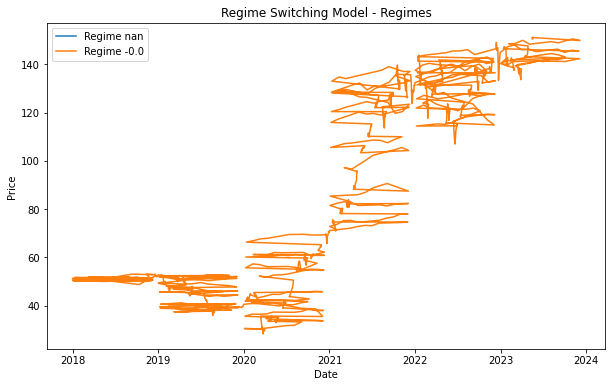

In [12]:
# Plot the regimes

fig, ax = plt.subplots(figsize=(10, 6))

for regime in funds['regime'].unique():
    
    regime_data = funds[funds['regime'] == regime]
    
    ax.plot(regime_data.index, regime_data['Price'], label=f"Regime {regime}")

ax.set_xlabel('Date')

ax.set_ylabel('Price')

ax.set_title('Regime Switching Model - Regimes')

ax.legend()

plt.show()

## Interpretation :

### The regime, labeled as -0.0, shows the estimated mean and volatility values. The mean value represents the average return of the time series data in this regime, which is approximately -0.000732 (negative value indicates a decrease in price). The volatility value, approximately 0.012977, represents the standard deviation or variability of the returns within this regime.

## 4) Expected Shortfall

### Expected Shortfall (ES), also known as Conditional Value-at-Risk (CVaR), is a risk measure that quantifies the expected loss beyond a specified confidence level. It provides a measure of the potential downside risk associated with an investment or portfolio.

In [13]:
# Define the confidence level (e.g., 95%)

confidence_level = 0.95

# Sort the daily returns in ascending order

sorted_returns = returns.sort_values()

# Determine the cutoff point index based on the confidence level

cutoff_index = int(confidence_level * len(sorted_returns))

# Calculate the expected shortfall (average of returns below the cutoff point)

expected_shortfall = sorted_returns[:cutoff_index].mean()

# Print the expected shortfall

print(f"Expected Shortfall at {confidence_level*100:.2f}% confidence level: {expected_shortfall:.4f}")

Expected Shortfall at 95.00% confidence level: -0.0026


## Interpretation : 

### Since the Expected Shortfall is negative (-0.0026), it implies that there is an anticipated downside risk in the mutual funds' returns. A negative Expected Shortfall indicates that, on average, the returns are expected to be below zero, which suggests a potential loss or decline in the investment.